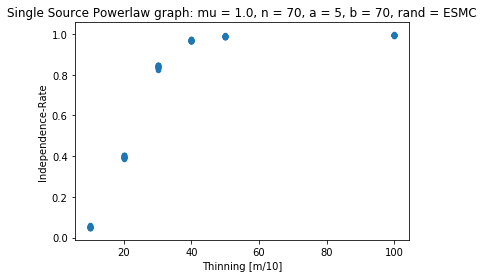

NameError: name 'valtype' is not defined

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

abv_dict = {
    "LCC" : "Local clustering coefficient",
    'DA'  : "Degree assortativity",
    "TRI" : "Triangle count",
    "IND" : "Independence-Rate",
    "DIAM" : "Diameter",
    "NETWORKIT_ES" : "ESMC",
    "CB_UNIFORM" : "CB_U",
    "CB_GLOBAL" : "CB_G"
}
rand_xlabel = {
    "NETWORKIT_ES" : " [m/10]",
    "CB_UNIFORM" : " [m/(10*avgdeg)]",
    "CB_GLOBAL" : ""
}

def plot_line_histogram(graph_dataset, label, valtype, xlabel, ylabel):
    plt.title(label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for ix, graph_data in zip(range(len(graph_dataset)), graph_dataset):
        data = np.array(graph_data)
        y, binEdges = np.histogram(data, bins='fd')
        bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
        plt.plot(bincenters, y, '-')

"""
    Dataline:
    Label
    RunL
    Gen
    Rand
    PID
    Thin
    Mu
    N
    P1
    P2
    P3
    Type
    Val
"""

# TODO Minimum of independence rate
df = pd.read_csv("SET.dat", sep='\t')
df[['RunL', 'Thin', 'Mu', 'N', 'Val']] = df[['RunL', 'Thin', 'Mu', 'N', 'Val']].apply(pd.to_numeric)

# Assumes PLDHH
thins = sorted(list(set(df['Thin'].astype('category').values)))
mus = sorted(list(set(df['Mu'].astype('category').values)))
metrics = list(set(df['Type'].astype('category').values))
ns = sorted(list(set(df['N'].astype('category').values)))
rands = list(set(df['Rand'].astype('category').values))
p1s = sorted(list(set(df['P1'].astype('category').values)))
p2s = sorted(list(set(df['P2'].astype('category').values)))
p3s = sorted(list(set(df['P3'].astype('category').values)))

for mu, n, rand, p1, p2, p3 in itertools.product(mus, ns, rands, p1s, p2s, p3s):
    title = "Single Source Powerlaw graph: mu = {}, n = {}, a = {}, b = {}, rand = {}".format(mu, n, p2, p3, abv_dict[rand])
    subdf = df.loc[(df['Mu'] == mu) & (df['N'] == n) & (df['Rand'] == rand) & (df['P1'] == p1) & (df['P2'] == p2) & (df['P3'] == p3)]
    if "IND" in metrics:
        subdf.loc[subdf['Type'] == 'IND'].plot(kind='scatter', x='Thin', y='Val')
        plt.title(str(title))
        plt.xlabel('Thinning{}'.format(rand_xlabel[rand]))
        plt.ylabel('Independence-Rate')
        plt.show()
        plt.close()

    for metric in metrics:
        if metric == 'IND':
            continue
        if metric == 'DIAM': #TODO
            continue
        data = [subdf.loc[(subdf['Thin'] == thin) & (df['Type'] == metric)]['Val'] for thin in thins]
        plot_line_histogram(data, title, valtype, abv_dict[metric], 'Density')
        plt.show()
        plt.close()